In [1]:
#|default_exp app

Import des librairies fastai et gradio

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_healthy(x): return x[0].isupper()

Chargement d'une image d'exemple de feuille saine pour vérifier notre model

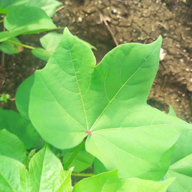

In [3]:
im = PILImage.create('Exemples/Healthy.jpg')
im.thumbnail((192,192))
im

Chargement de notre model.pkl provenant du jupyter model.ipynb

In [4]:
#|export
learn = load_learner('model.pkl')

Vérifiaction de notre model avec l'image d'exemple ci dessus, plus affichage du temps de réponse

In [5]:
%%time
learn.predict(im)

Wall time: 84.5 ms


('Healthy',
 TensorBase(3),
 TensorBase([1.3677e-06, 2.2064e-07, 8.9837e-09, 1.0000e+00, 2.9823e-08,
             3.2561e-07]))

Ajouts des labels des catégories

In [6]:
#|export
categories = ('Aphids', 'Army worm', 'Bacterial Blight', 'Healthy', 'Powdey Mildew', 'Target spot')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

Affichage des résultats de la prédiction mais avec les labels pour plus de visibilité

In [7]:
classify_image(im)

{'Aphids': 1.3677125707545201e-06,
 'Army worm': 2.2063532867377944e-07,
 'Bacterial Blight': 8.983675137130831e-09,
 'Healthy': 0.9999980926513672,
 'Powdey Mildew': 2.982294944331443e-08,
 'Target spot': 3.256092782066844e-07}

On a presque 100% de match pour la feuille saine, ce qui est le résultat voulus

Création de l'interface local (puis pour huggingface) de notre model

Avec un exemple de chaque catégorie sélectionnable

In [8]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['Exemples/Aphids.jpg', 'Exemples/Army worm.jpg', 'Exemples/Bacterial Blight.jpg', 'Exemples/Healthy.jpg', 'Exemples/Powdey Mildew.jpg', 'Exemples/Target spot.jpg']

title = "Leaf disease recognition"
description = "<p style='text-align: center'>Identifier sur une photo de feuille d'arbre si elle saine sinon de quoi elle est atteinte.</br>Catégories : Aphids, Army worm, Bacterial Blight, Healthy, Powdey Mildew, Target spot</p>"

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

c:\Python39\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Python39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Python39\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Python39\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


affichage des tensor et autres paramètres

In [20]:
m = learn.model
ps = list(m.parameters())

In [21]:
ps[1]

Parameter containing:
tensor([ 2.3440e-01,  2.6681e-01, -5.1096e-08,  5.1773e-01,  3.4404e-09,
         2.2183e-01,  4.2317e-01,  1.3153e-07,  2.5139e-01,  1.5152e-06,
         3.1692e-01,  2.5036e-01,  3.7966e-01,  1.0862e-05,  2.7543e-01,
         2.3581e-01,  2.4126e-01,  3.9501e-01,  4.6930e-01,  2.9075e-01,
         2.7248e-01,  2.7778e-01,  2.9011e-01,  2.0662e-01,  2.5882e-01,
         2.7885e-01,  2.9157e-01,  3.1651e-01,  3.8930e-01,  3.0357e-01,
         2.6747e-01,  2.1000e-01,  2.8686e-01,  3.3259e-01,  4.2605e-01,
         3.7350e-01,  7.4804e-08,  1.9047e-01,  1.4740e-08,  2.2216e-01,
         1.7881e-01,  2.4859e-01,  2.7404e-01,  2.6027e-01,  2.9470e-01,
         2.9876e-01,  2.2399e-01,  2.6289e-01,  2.2001e-08,  2.6663e-01,
         2.2132e-01,  2.8523e-01,  3.2991e-01,  2.2610e-01,  3.6598e-01,
         2.1201e-01,  2.3872e-01,  2.4902e-01,  5.2605e-01,  2.4842e-01,
         2.9574e-01,  2.5956e-01,  4.8433e-01,  2.6712e-01],
       requires_grad=True)

In [22]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [23]:
ps[0]

Parameter containing:
tensor([[[[-1.0425e-02, -6.1071e-03, -1.8009e-03,  ...,  5.6630e-02,
            1.7085e-02, -1.2730e-02],
          [ 1.1043e-02,  9.5079e-03, -1.0997e-01,  ..., -2.7127e-01,
           -1.2911e-01,  3.6872e-03],
          [-7.0016e-03,  5.9039e-02,  2.9542e-01,  ...,  5.1966e-01,
            2.5627e-01,  6.3510e-02],
          ...,
          [-2.7598e-02,  1.5991e-02,  7.2525e-02,  ..., -3.3293e-01,
           -4.2066e-01, -2.5789e-01],
          [ 3.0551e-02,  4.0907e-02,  6.2776e-02,  ...,  4.1376e-01,
            3.9351e-01,  1.6598e-01],
          [-1.3804e-02, -3.7298e-03, -2.4153e-02,  ..., -1.5076e-01,
           -8.2301e-02, -5.8531e-03]],

         [[-1.1349e-02, -2.6545e-02, -3.4588e-02,  ...,  3.2554e-02,
            6.8441e-04, -2.5747e-02],
          [ 4.5713e-02,  3.3631e-02, -1.0452e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2969e-03],
          [-8.2178e-04,  9.8418e-02,  4.0208e-01,  ...,  7.0785e-01,
            3.6885e-01,  1.2454e-01]

# Export

Génération automatique du app.ipynb en app.py

In [17]:
from nbdev.export import nb_export

In [18]:
nb_export('app.ipynb', './')